In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2
import pandas as pd
from scipy import spatial
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull
from scipy.interpolate import interp1d
import networkx as nx
import utils.nn_helper as helper
nn_helper = helper.NNHelper()

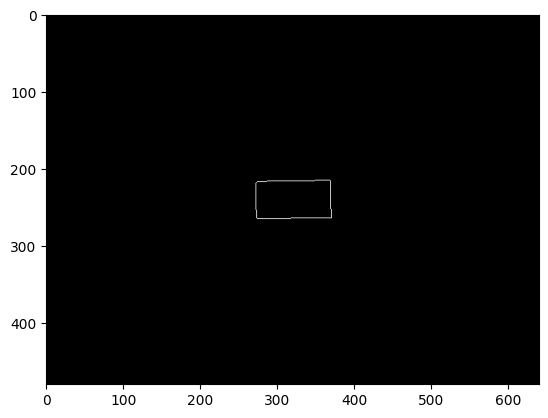

In [3]:
img = cv2.imread("./data/post_manip_data/image_0_0.png", 0)
_, boundary = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
# boundary = cv2.Canny(img,100,200)

# kernel = np.ones((3,3),np.uint8)
# mask = cv2.morphologyEx(boundary, cv2.MORPH_CLOSE, kernel)

plt.imshow(boundary, cmap="gray")

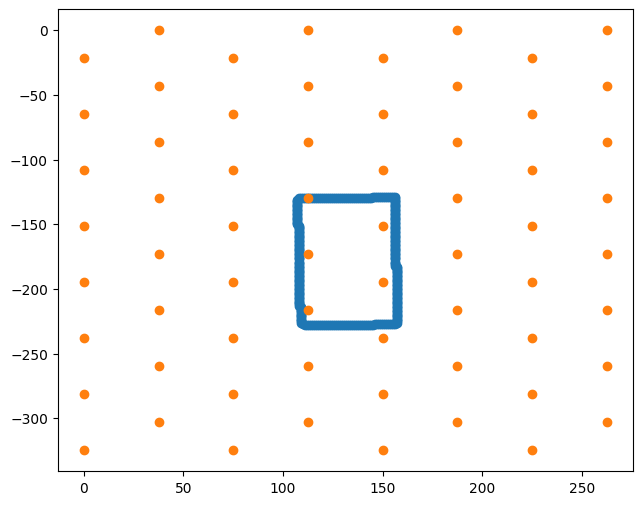

In [4]:
##### SIM CAMERA CALIBRATION #####
boundary_pts = np.array(np.where(boundary==255)).T
min_x, min_y = np.min(boundary_pts, axis=0)
max_x, max_y = np.max(boundary_pts, axis=0)
plane_size = 1000*np.array([(0.132-0.025, -0.179-0.05),(0.132+0.025, -0.179+0.05)])

boundary_pts[:,0] = (boundary_pts[:,0] - min_x)/(max_x-min_x)*(plane_size[1][0]-plane_size[0][0])+plane_size[0][0]
boundary_pts[:,1] = (boundary_pts[:,1] - min_y)/(max_y-min_y)*(plane_size[1][1]-plane_size[0][1])+plane_size[0][1]


f = plt.figure(figsize=(6*1.237169,6)) 
ax = f.add_subplot(111)
ax.scatter(boundary_pts[:,0],boundary_pts[:,1])
ax.scatter(nn_helper.kdtree_positions[:,0],nn_helper.kdtree_positions[:,1])

{(2, 4), (5, 5), (5, 4), (4, 2), (4, 5), (3, 3), (3, 2), (6, 3), (3, 5)} {(5, 3), (3, 4), (4, 4), (4, 3)}


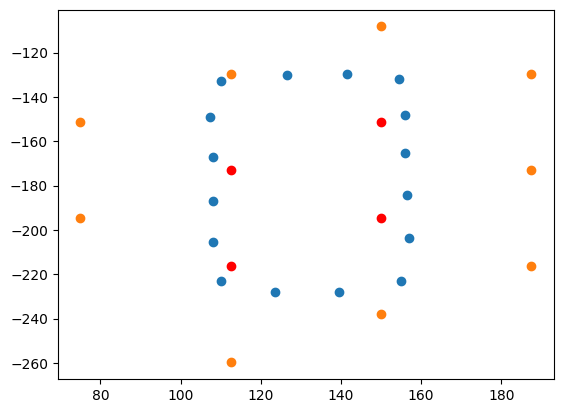

In [5]:
idxs, neg_idxs, DG, pos = nn_helper.get_nn_robots(boundary_pts, 16)
print(idxs, neg_idxs)
# idxs = np.array([[2, 4],
#                  [5, 5],
#                  [4, 3],
#                  [5, 4],
#                  [4, 2],
#                  [5, 3],
#                  [3, 2],
#                  [6, 3],
#                 ])
idxs = np.array(list(idxs))
neg_idxs = np.array(list(neg_idxs))
plt.scatter(*nn_helper.cluster_centers.T)
plt.scatter(*nn_helper.robot_positions[idxs[:,0], idxs[:,1]].T)
plt.scatter(*nn_helper.robot_positions[neg_idxs[:,0], neg_idxs[:,1]].T, color='red')


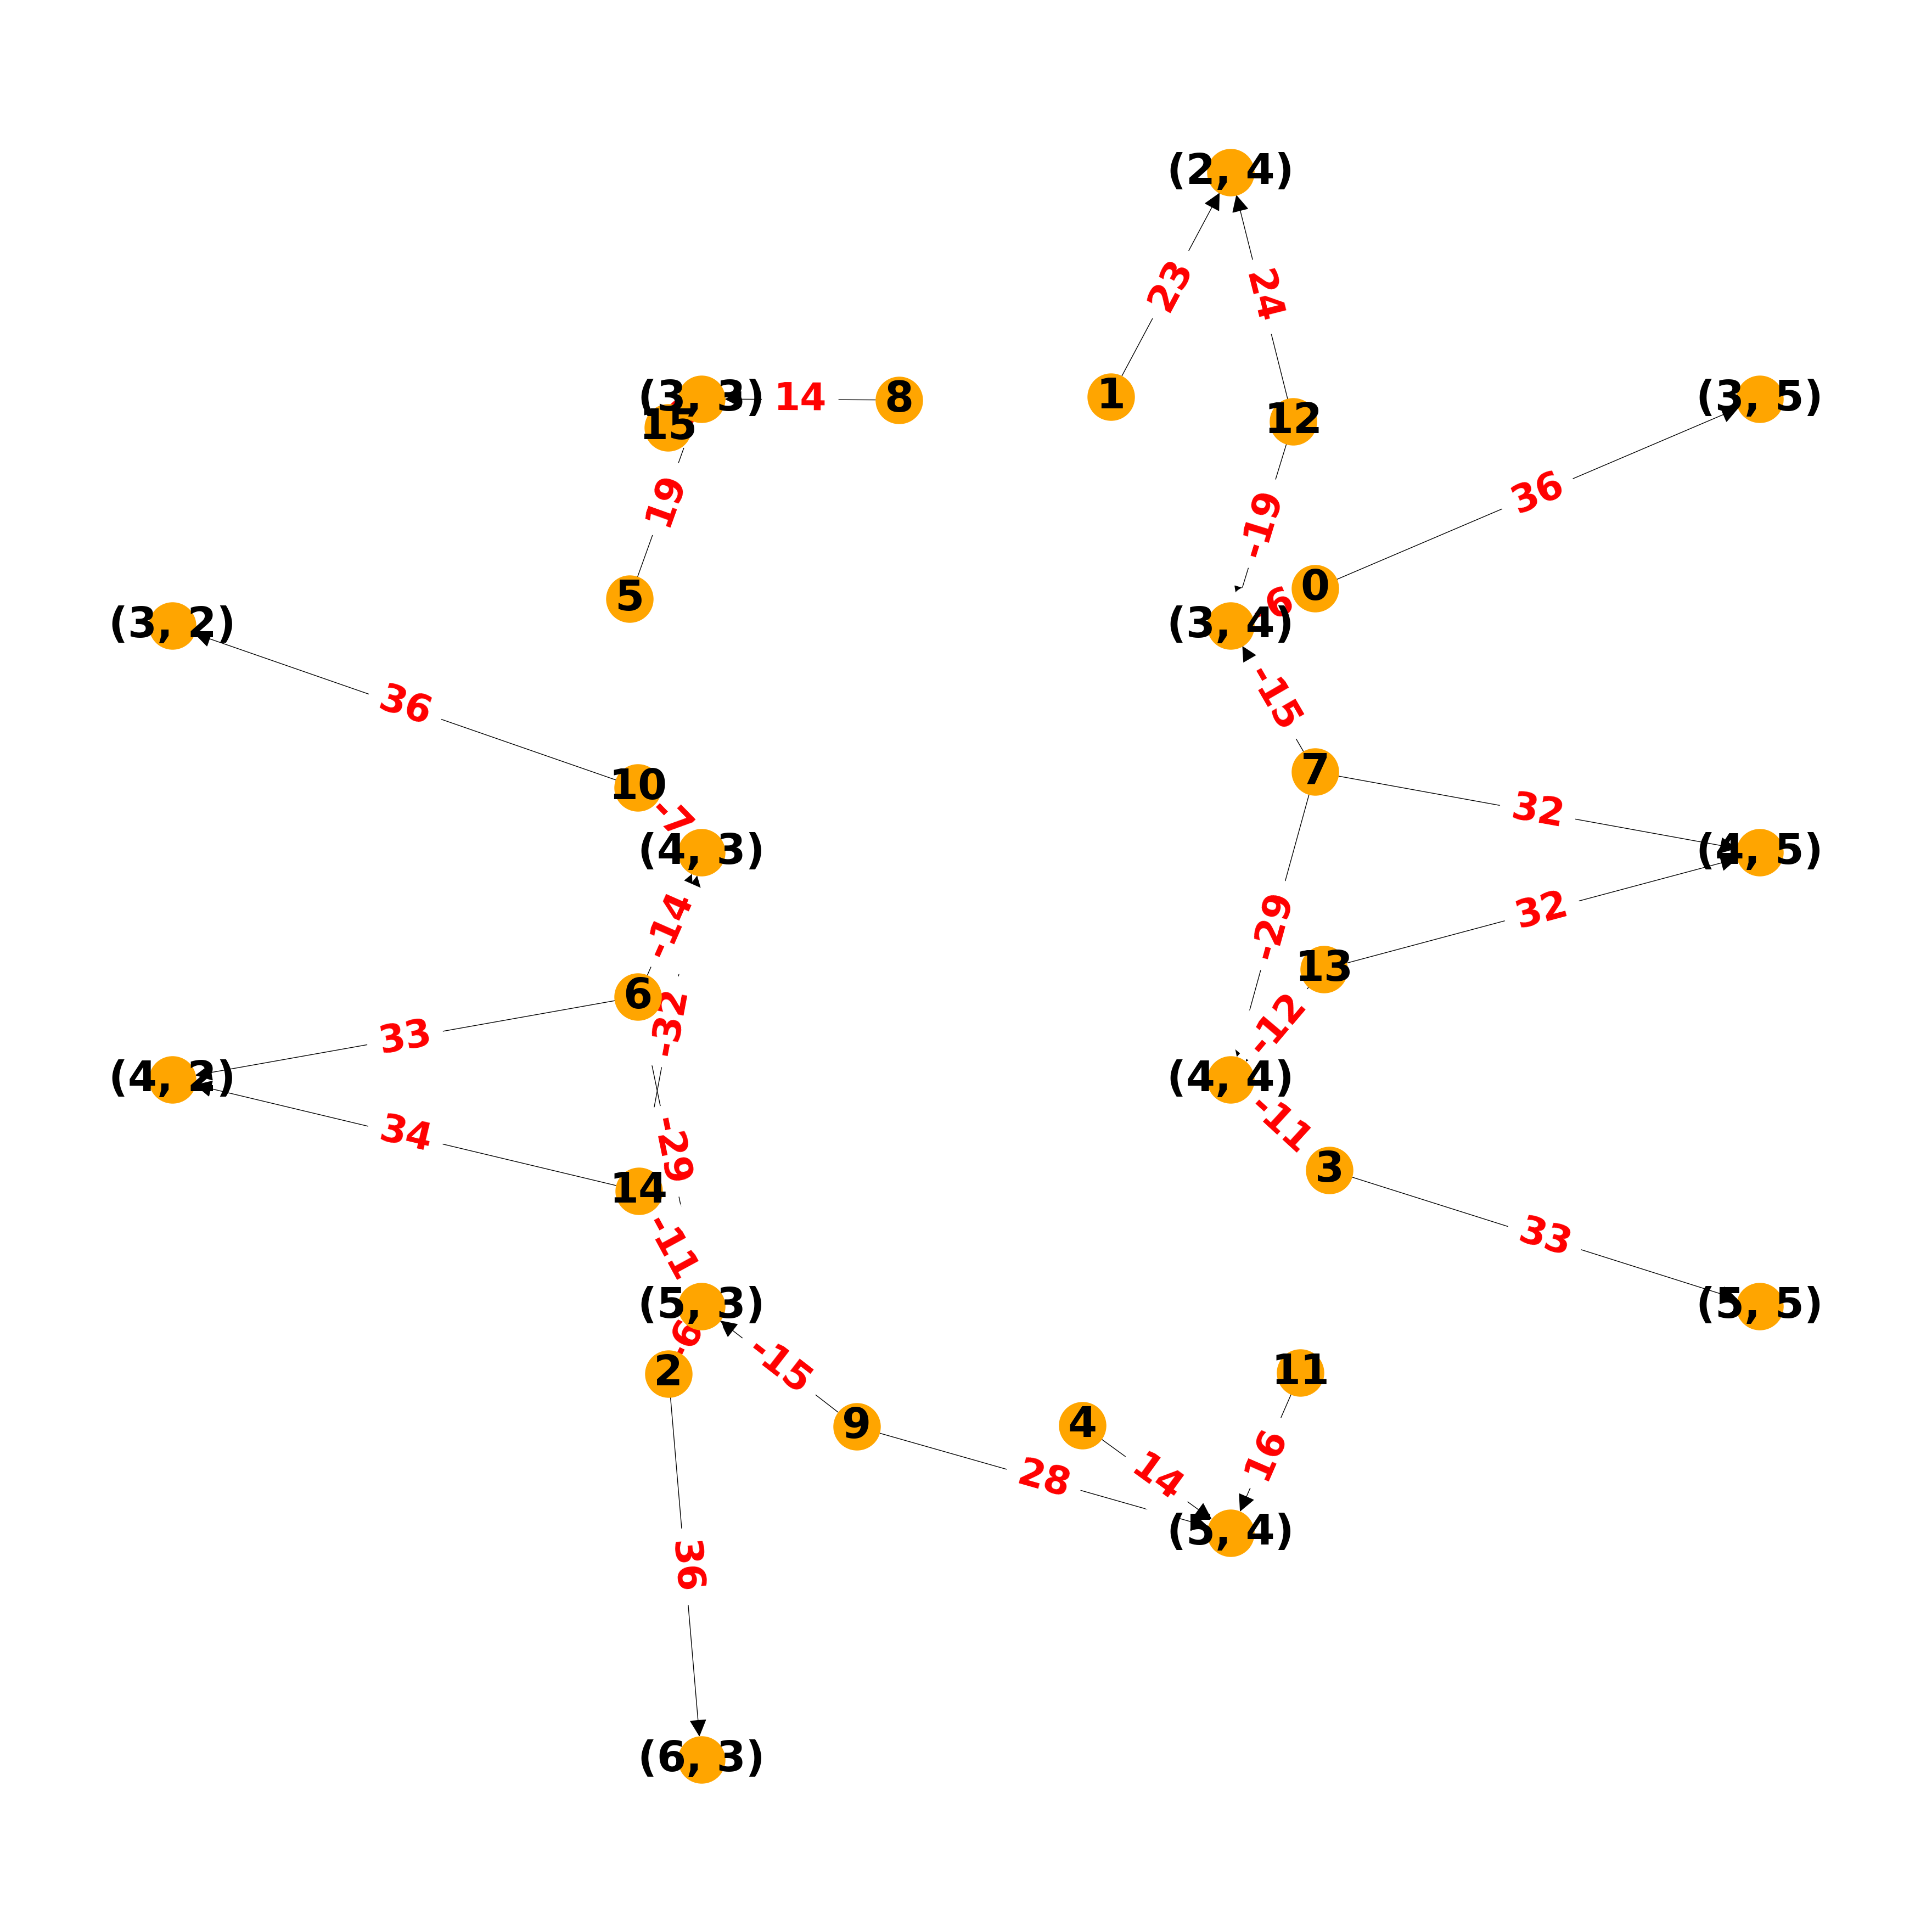

In [6]:
nn_helper.draw_graph(DG, pos, scale=5)

In [7]:
cols = ['com_x', 'com_y'] + [f'robotx_{i}' for i in range(64)] + [f'roboty_{i}' for i in range(64)]
df = pd.DataFrame(columns=cols)

In [8]:
df

,com_x,com_y,robotx_0,robotx_1,robotx_2,robotx_3,robotx_4,robotx_5,robotx_6,robotx_7,...,roboty_54,roboty_55,roboty_56,roboty_57,roboty_58,roboty_59,roboty_60,roboty_61,roboty_62,roboty_63
